In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.expected_conditions import visibility_of_element_located
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from datetime import datetime
import pandas as pd
import numpy as np
import random
import time
import os
import re

In [2]:
# Create directory to save scraped data

now = datetime.now()
start_date = now.strftime('%d%m%Y')
os.makedirs('data/' + start_date, exist_ok=True)


In [3]:
driver = webdriver.Chrome()
driver.implicitly_wait(10)
BASE_URL = 'https://www.jobstreet.com.my/'
driver.get(BASE_URL)
driver.maximize_window()

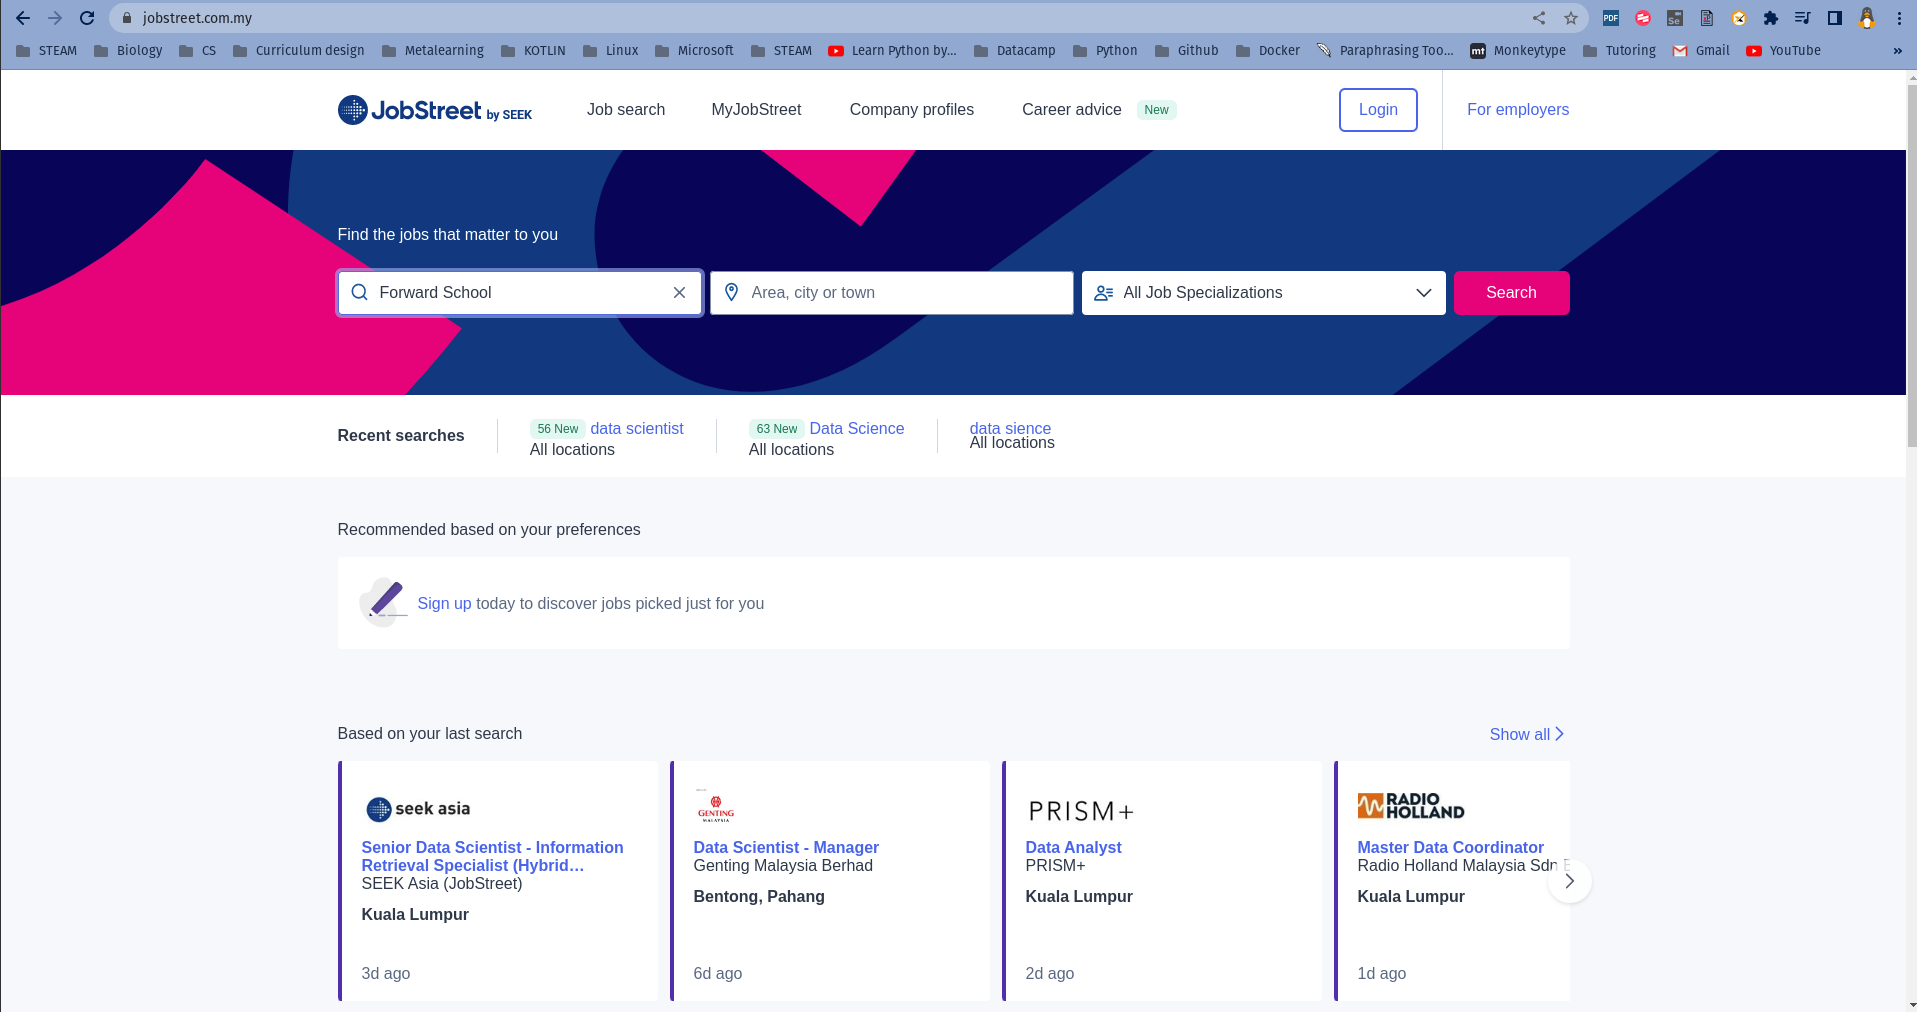

In [4]:
job_field = driver.find_element(By.XPATH, "//input[@id='searchKeywordsField']")
job_field.clear() # clearing keyword

KEYWORDS = [
    'Data science',
#     'Data analyst',
#     'data engineer',
#     'full stack data scientist',
#     'sql engineer'
]

In [5]:
job_field.send_keys(KEYWORDS)
search_button = driver.find_element(By.XPATH, "//button[@type='submit']")
search_button.click()

In [6]:
# looping through all the cards in the first page

# cards = driver.find_elements(By.TAG_NAME, 'article') # xpath is not unique and targets only specific card
# for card in cards:
#     card_button = WebDriverWait(driver,20).until(EC.element_to_be_clickable(card))
#     driver.execute_script('arguments[0].click();',card_button)


##### the reason why i used js in line 4: https://stackoverflow.com/questions/37938287/why-cant-i-click-an-element-in-selenium-using-python-and-chrome-webdriver

### To collect all the data as below in the card
Job title
Job Location
Company name
Salary
Job description
URL for the job post


In [7]:
page = 1

while True:

    job_post_index = 0

    try:

        print(f'Collecting data: {page}....', end="")

        articles = driver.find_elements(By.TAG_NAME, "article")

        time.sleep(1 + 2*random.random())
        to_frame = []
        items = 0

        for article in articles:
        
            time.sleep(1 + 2*random.random())

            job_button = WebDriverWait(driver, 20).until(
                    EC.element_to_be_clickable(article))

            try:

                driver.execute_script('arguments[0].click();', job_button)
                items += 1

                try:
                    summary = driver.find_element(By.XPATH, "//div[@data-automation='jobDescription']").text.strip()

                except:
                    summary = None
                
            except:
                print(f'click {job_post_index} failed')

            location = article.find_elements(By.TAG_NAME, 'span')[3].text.strip()
            title = article.find_elements(By.TAG_NAME, 'span')[0].text.strip()
            company = article.find_elements(By.TAG_NAME, "span")[1].text.strip()

            test_salary = article.find_elements(By.TAG_NAME, "span")[5].text.strip()

            if re.search('MYR', test_salary.lower()):
                salary = test_salary
            else:
                salary = None

            # try to get url,
            job_url = article.find_elements(By.TAG_NAME, 'a')[0].get_attribute('href')
         
            job_info = {
                'location': location,
                'title': title,
                'company': company,
                'salary': salary,
                'summary': summary,
                'job_url': job_url}

            to_frame.append(job_info)
            job_post_index += 1
        
        framed_df = pd.DataFrame(to_frame)
        framed_df.to_csv('data/' + start_date + '/page' + str(page) + '.csv', index=False)
        print('Saved!')

        start_url = driver.current_url

        next_page = WebDriverWait(driver, 20).until(
                EC.element_to_be_clickable((By.XPATH,
                "//span[normalize-space()='Next']"
                )))

        driver.execute_script("arguments[0].click();", next_page)

        next_url = driver.current_url

        if start_url == next_url:
            print(f"Scraper stopped, scraping ended at page {page - 1}")
            break

        page += 1

    except:
        print(f"Exception triggered, scaping ended at page {page - 1}")
        break

print('/nScrape End')
# framed_df.to_csv('data/' + start_date + '/page' + str(page) +'.csv', index=False)

/nScrape End


In [8]:
file_count = len(os.listdir("./data/" + start_date ))

result_df = pd.read_csv('data/' + start_date +'/page1.csv')

for page in range(2,file_count,1):

    print(f"loading page {page}....", end="")

    df_to_add = pd.read_csv('data/' + start_date + '/page'+ str(page) + '.csv')

    result_df = pd.concat([result_df, df_to_add])

    print('Done!')
os.makedirs("data/final_" + start_date,exist_ok=True)
result_df.to_csv('data/final_' + start_date + '/final' + '.csv', index=False)

result_df.shape

FileNotFoundError: [Errno 2] No such file or directory: 'data/28122022/page1.csv'